# Домашняя работа №1
## Применение линейных моделей для классификации фотографий с цифрами 5 и 6

In [1]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

ModuleNotFoundError: No module named 'tqdm'

### Фиксирование рандомных величин

In [50]:
np.random.seed(11)

### Загрузка данных с файла

In [64]:
#Тестовая и обучающая выборки
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)
    
#Выборка, результат которой мы должны предсказать
with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

### Пример, как можно визуализировать данные

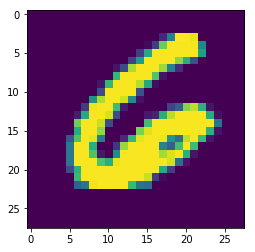

In [65]:
plt.imshow(train['data'][80].reshape(28,28))

### Итак, поехали

In [66]:
data_train = train['data'] 
labels_train = train['labels']

def norm_data(data):
    mean = np.mean(data, axis = 0)
    std = np.std (data, axis = 0)
    data = (data - mean) / (std + 0.0001)

    # добавляем единичную колонку для w0
    data = np.hstack([ np.ones((data.shape[0], 1)), data] )
    return data

def sigmoid_function(w,x):
    return 1/(1 + math.exp(-np.dot(w,x)))

def predict(w, x):
    return [sigmoid_function(w, xx) for xx in x]

def logloss (x,w,y):
    sum_= 0
    for i in range (len(y)):
        sum_ = sum_ + math.log1p(math.exp((-1)*np.dot(w.T,x[i])*y[i]))
    return sum_

def pred(w, x):
    return [1 if sigmoid_function(w, xx) > 0.5 else -1 for xx in x]

#конвертация к 1/-1
labels_train_ = labels_train - 6
labels_train_[labels_train_ == 0] = 1
data_train_ = norm_data(data_train)

#Разделение на тестовую и обучающую выборку
x_train, x_test, y_train, y_test = train_test_split(data_train_, labels_train_, random_state=1)


# Инициализируем веса случайны образом
w = np.random.normal( scale=0.00001, size = x_train.shape[1])

#массивы для сбора данных

k = 65
log_loss_train = np.zeros(x_train.shape[0]*k)
log_loss_test = np.zeros(x_train.shape[0]*k)
persentage_train = np.zeros(x_train.shape[0]*k)
persentage_test = np.zeros(x_train.shape[0]*k)

iter_ = 0
l_r = 0.0003

#цикл обучения
import tqdm
for iter in tqdm.tqdm_notebook(range(k)):
    l_r = l_r - 0.000000001
    for i in range(int(x_train.shape[0])):
        
        j = np.random.randint(0, x_train.shape[0])
        grad = - y_train[j] * x_train[j] / \
            ( 1 + math.exp( y_train[j] * np.dot(w.T, x_train[j]))) + 0.0001*w
        
        #log_loss_train[iter_] = logloss (x_train,w,y_train)
        #log_loss_test[iter_] = logloss (x_test,w,y_test)
        #persentage_train[iter_] = accuracy_score(pred(w,x_train), y_train)
        #persentage_test[iter_] = accuracy_score(pred(w,x_test), y_test) 
        w = w - l_r * grad
        iter_ += 1
        
print (logloss (x_train,w,y_train))        
print (logloss (x_test,w,y_test))
print (accuracy_score(pred(w,x_test), y_test))
#x = np.arange(iter_)


254.68450953833718
135.95577230246332
0.984


### Отображаем полученные графики

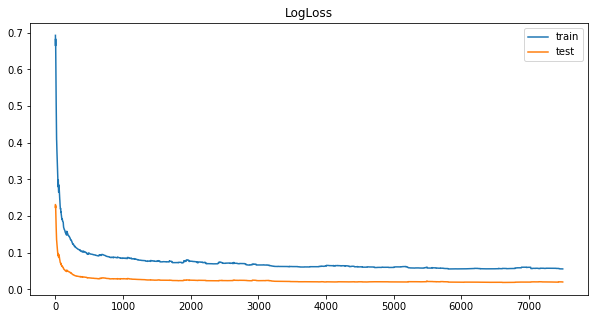

In [35]:
plt.figure(figsize=(10,5))
plt.title('LogLoss')
plt.plot(x, log_loss_train/len(log_loss_train), '-', label='train')
plt.plot(x, log_loss_test/len(log_loss_test), '-', label='test')
plt.legend()
plt.show()



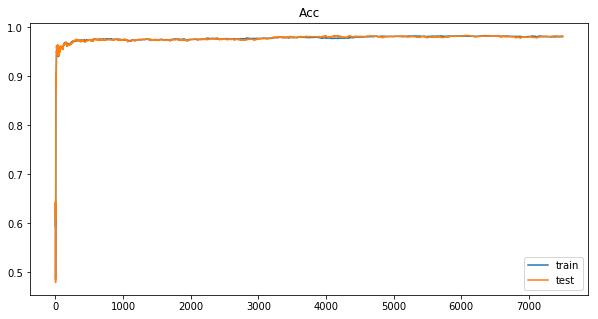

In [37]:
plt.figure(figsize=(10,5))
plt.title('Acc')
plt.plot(x, persentage_train, '-', label='train')
plt.plot(x, persentage_test, '-', label='test')
plt.legend()
plt.show()

# Сохраняем данные для кагла

In [48]:
test_no_lables_ = norm_data(test_no_lables['data'])
with open('new_solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(len(test_no_lables['data'])):
        print(i, sigmoid_function(w,test_no_lables_[i]), sep=',', file=fout)